# Сборный проект

Описание данных
•	Name — название игры
•	Platform — платформа
•	Year_of_Release — год выпуска
•	Genre — жанр игры
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)
•	EU_sales — продажи в Европе (миллионы проданных копий)
•	JP_sales — продажи в Японии (миллионы проданных копий)
•	Other_sales — продажи в других странах (миллионы проданных копий)
•	Critic_Score — оценка критиков (максимум 100)
•	User_Score — оценка пользователей (максимум 10)
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.



Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Поставленная задача планируемая кампанию на 2017-й. Для анализа предсавлен датасет с информацией по играм, выпускаем на разные платформы за период с 1980 по 2016 год.
На первом шаге необходимо провести анализ данных на пропуски, дубликаты , аномальные данные и прочие ошибки в заполнении данных с последующим их устраннением. Далее проведем анализ актуальных данных, начиная с 2013 года для определения общих тенденций в игровой индустрии. Для этого проанализируем следующие параметры:
•	сколько игр выпускалось в разные годы;
•	как менялись продажи по платформам; 
•	выберем платформы с наибольшими суммарными продажами с учетом распределения по годам;
•	проанализируем данные  разных платформ -  лидиров по продажам;
Проанализировав эти данные помогут построить прогноз на 2017 год.
</div>

# Общая информация.

In [2]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
import numpy as np

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.set_axis(data.columns.str.lower(), axis='columns', inplace=True)
#приводим заголовки столбцов к одному виду

In [6]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>],
       [<AxesSubplot:title={'center':'eu_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

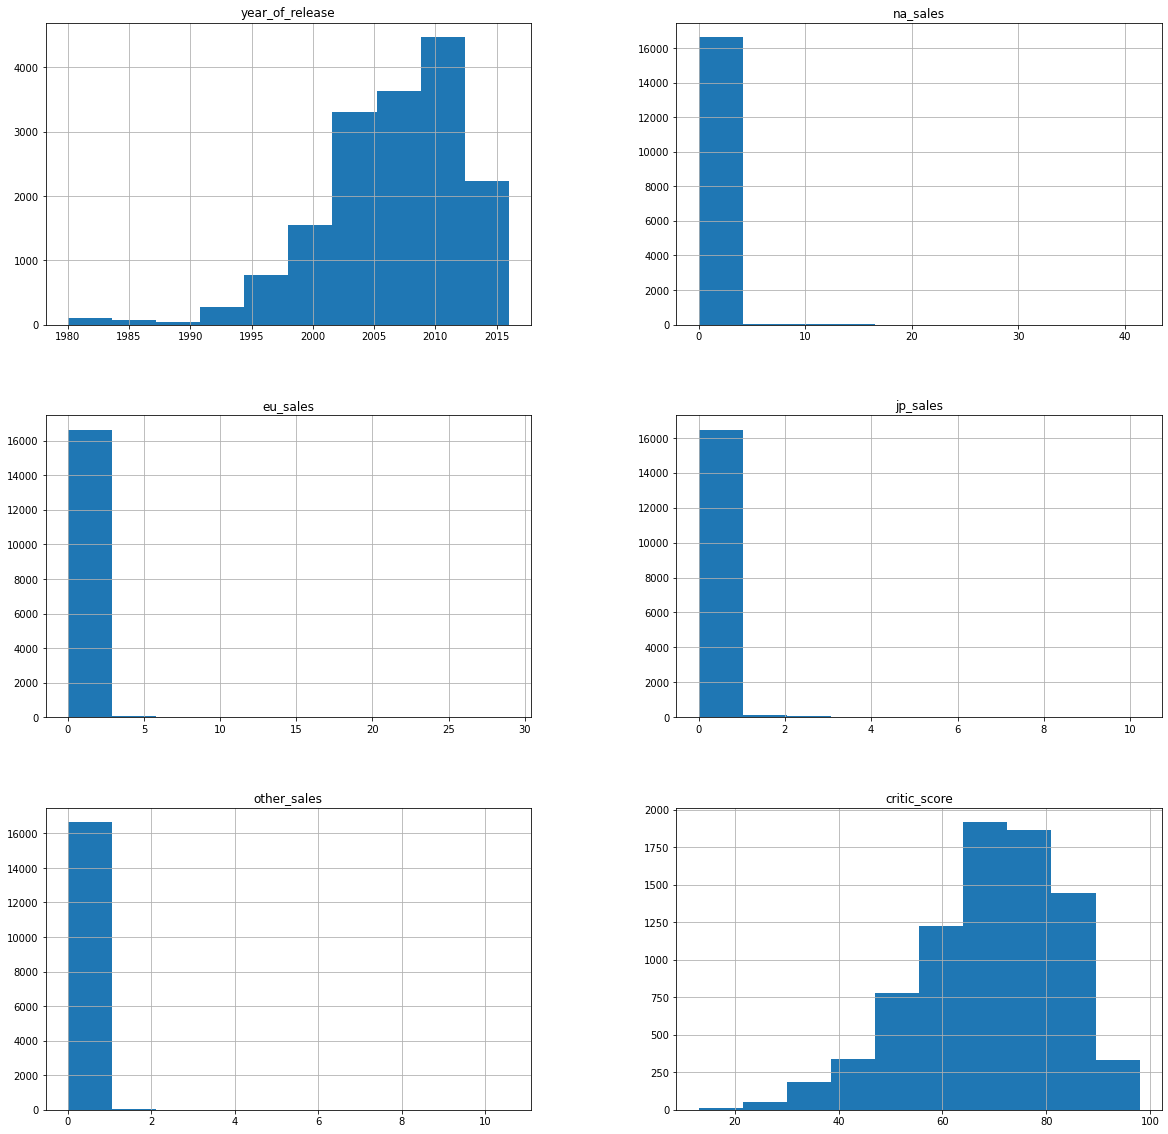

In [7]:
data.hist(figsize=(20, 20))

In [8]:
#проверим данные на наличие дубликатов
duplicated_raws = data[data.duplicated()].sum()
duplicated_raws

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

In [9]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
len(data['platform'].unique())

31

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В выбраном датасете 31 игровая платформа ('Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX')

# Предобработка данных

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
print ('Количество пропущенных значений в столбце name:',
(len(data[data['name'].isna()])))

Количество пропущенных значений в столбце name: 2


Пропущенные значения неважны для целей исследования. Строки с пропущенными данными можно удалить, что не скажется на результатах исследования).

In [14]:
print ('Количество пропущенных значений в столбце year_of_release:',
(len(data[data['year_of_release'].isna()])))

Количество пропущенных значений в столбце year_of_release: 269


Пропущенные значения неважны для целей исследования. Строки с пропущенными данными можно удалить, что не скажется на результатах исследования).

In [15]:
print ('Количество пропущенных значений в столбце genre:',
(len(data[data['genre'].isna()])))

Количество пропущенных значений в столбце genre: 2


Данные можно заполнить вручную исходя из информации на сайте разработчика игр или открытых данных в интернете.

In [16]:
print ('Количество пропущенных значений в столбце critic_score:',
(len(data[data['critic_score'].isna()])))

Количество пропущенных значений в столбце critic_score: 8578


In [17]:
print ('Количество пропущенных значений в столбце user_score:',
(len(data[data['user_score'].isna()])))

Количество пропущенных значений в столбце user_score: 6701


In [18]:
print ('Количество пропущенных значений в столбце rating:',
(len(data[data['rating'].isna()])))

Количество пропущенных значений в столбце rating: 6766



2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [20]:
data.year_of_release = data.year_of_release.astype('Int64')
# дата выпуска целое число, поэтому преобразуем в int.

In [21]:
data.user_score = np.where(data.user_score == 'tbd', np.nan, data.user_score)
#data.dropna(subset=['user_score'], inplace=True)
data.user_score = data.user_score.astype('float')
#изначачально столбец user_score относится к типу object. Т.к. в данном столбце находятся оценки пользователей( в числах) 
#изменяем его на float для приведения в соотвтетсвие с другим столбцом (оценка критиков) для дальнейшего сравнения и произведения оасчетов

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


2.3 Обработайте пропуски при необходимости

In [23]:
data = data.dropna(subset=['name','year_of_release'])
# удаляем строки с пропусками в name и 'year_of_release


In [24]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
data.groupby('genre')['rating'].value_counts()
# для каждого жанра найдем самый частый рейгинг и заменим им

genre         rating
Action        T          670
              M          596
              E10+       468
              E          410
              AO           1
              EC           1
Adventure     E          159
              T          114
              M           98
              E10+        67
              EC           2
Fighting      T          357
              M           48
              E10+        19
              E            8
Misc          E          449
              T          228
              E10+       166
              M           13
              EC           5
              K-A          1
Platform      E          354
              E10+       141
              T           63
              M            3
Puzzle        E          284
              E10+        42
              T           10
Racing        E          576
              T          167
              E10+        95
              M           18
Role-Playing  T          415
              M       

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
import warnings

warnings.filterwarnings("ignore")
def func(row):
    if row['rating'] != np.nan:
        if row['genre'] == 'Action':
            return 'T'
        if row['genre'] == 'Adventure':
            return 'E'
        if row['genre'] == 'Fighting':
            return 'T'
        if row['genre'] == 'Misc':
            return 'E'
        if row['genre'] == 'Platform':
            return 'E'
        if row['genre'] == 'Puzzle':
            return 'E'
        if row['genre'] == 'Racing':
            return 'E'
        if row['genre'] == 'Role-Playing':
            return 'T'
        if row['genre'] == 'Shooter':
            return 'M'
        if row['genre'] == 'Simulation':
            return 'E'
        if row['genre'] == 'Sports':
            return 'E'
        if row['genre'] == 'Strategy':
            return 'T'

In [28]:
#data.rating = data.apply(lambda x: func(x), axis=1)

In [29]:
#data['rating'].unique()

In [30]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [32]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [33]:
data.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Шаг 3. Проведите исследовательский анализ данных

3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:xlabel='Год выпуска', ylabel='Количество игр'>

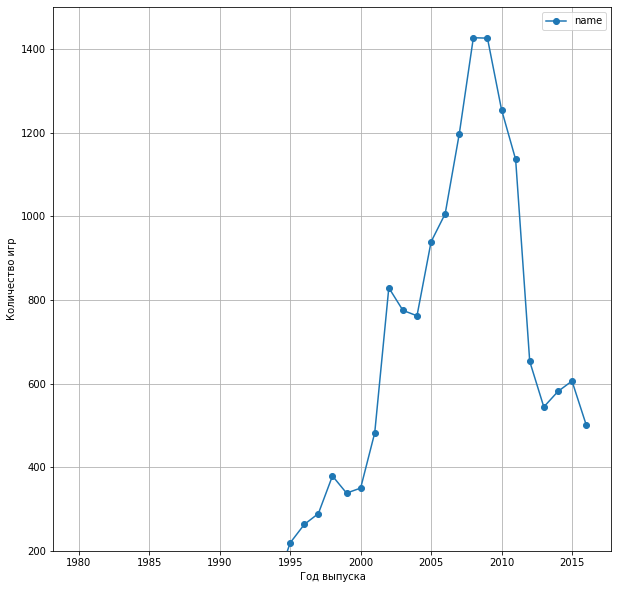

In [34]:
data.pivot_table(index = 'year_of_release', values='name',aggfunc ='count').plot(grid=True, style='o-',figsize=(10, 10), 
xlabel='Год выпуска', 
ylabel='Количество игр',   
ylim=(200, 1500))

<AxesSubplot:>

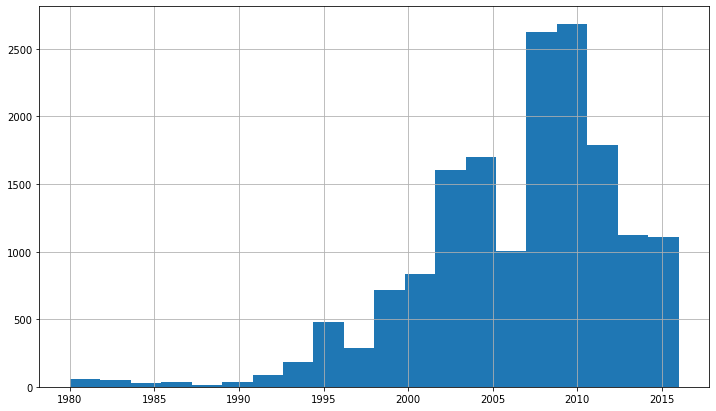

In [35]:
data['year_of_release'].hist(bins = 20, range=(1980,2016), figsize = (12,7))


In [36]:
#data.query('year_of_release == 2006').head(50)
#data.query('year_of_release == 2009').head(50)
data.query('year_of_release == 2012').head(50)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN,8.06
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.76
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44
176,Assassin's Creed III,X360,2012,Action,3.13,1.69,0.03,0.44,84.0,6.7,M,5.29


С 1980 наблюдается рост выпуска в связи с ростом количества платформ и выпускаемым играм к ним. В больщом количестве выпускались несдлжные аркадные игры. К 2006 году на рынке начинают доминировать компании Sony Playstation, DS (?) XBox и ПК. 
В 2008 году начинается крупный мировой экономический кризис, который в т.ч. отражется на игровой индустрии. В октябре 2008 года цена акций EA упала на 75% с 50 до 15 долларов и оставалось на этом уровне ещё пять лет. А ведь EA была самым крупным издателем в мире. Акции Activision Blizzard, Take-Two, THQ, Gamestop и Nintendo провалились на 50%. Это отразилось на количестве выпускаемых игр - в 2012 их количество снизилось вдвое по с сравнению с предыдущим годом

3.2 Посмотрите, как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
data.groupby(['platform', 'year_of_release'])['world_sales'].sum().sort_values(ascending=False).head(30)

platform  year_of_release
PS2       2004               211.81
Wii       2009               206.97
PS2       2002               205.38
          2003               184.31
Wii       2008               171.32
X360      2010               170.03
PS        1998               169.49
PS2       2001               166.43
          2005               160.66
PS3       2011               156.78
Wii       2007               152.77
DS        2007               146.94
          2008               145.31
PS        1999               144.53
X360      2011               143.84
PS3       2010               142.17
Wii       2006               137.15
PS        1997               136.17
X360      2008               135.26
PS3       2009               130.93
DS        2005               130.14
Wii       2010               127.95
X360      2009               120.29
DS        2006               119.81
          2009               119.54
PS4       2015               118.90
PS3       2008               118.52
  

Одной из самых популярных платформ является PS 
PS2 лидер по количеству проданных игр в мире в 2001 - 2006 годах. 

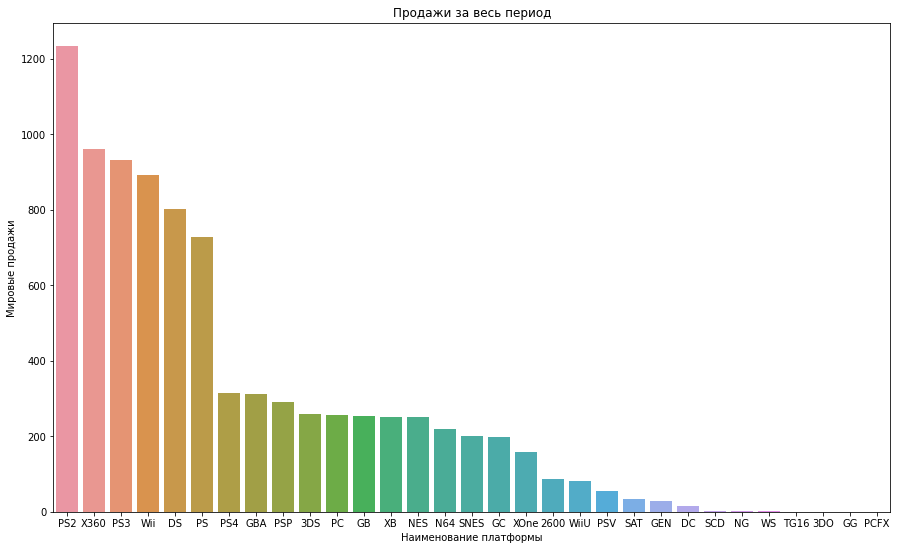

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
platform_sales = (data.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values
('world_sales', ascending=False))
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'world_sales').set
(title = 'Продажи за весь период', xlabel = 'Наименование платформы', ylabel = 'Мировые продажи'))
plt.show()

За весь период топ - 6 платформ являются:
1.PlayStation 2 
2.Xbox360 
3.PlayStation 3 
4.Wii Nintendo 
5.Nintendo DS 
6.PlayStation

<AxesSubplot:xlabel='year_of_release'>

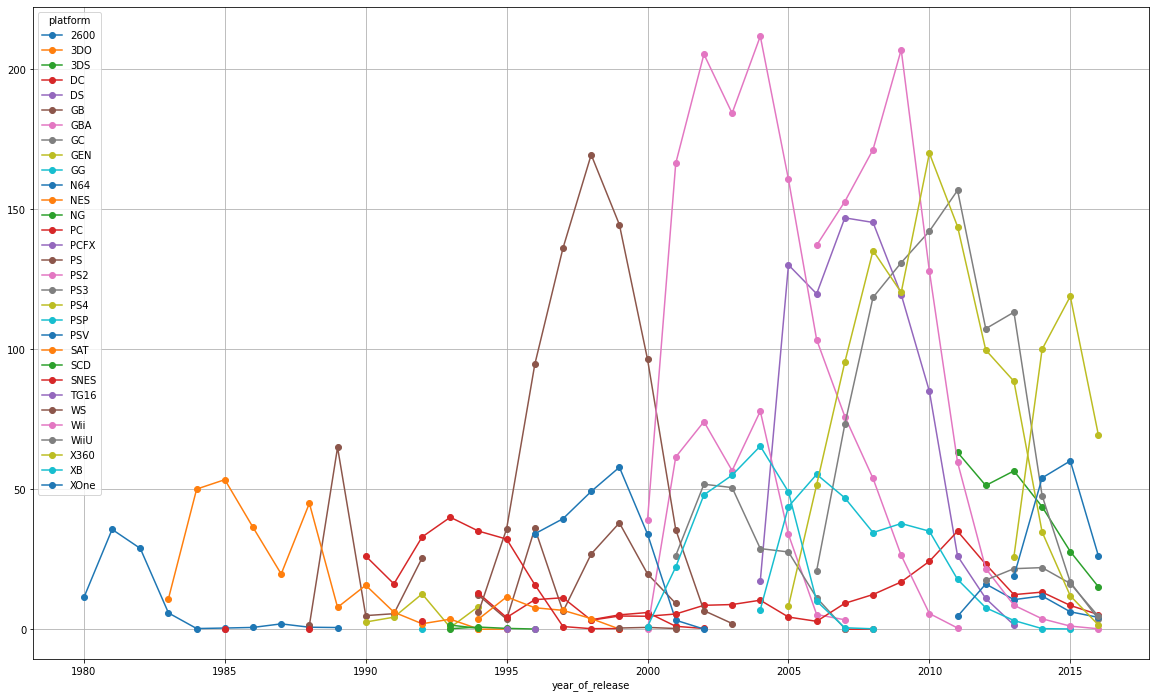

In [39]:
data.pivot_table(index = 'year_of_release', columns = 'platform', values= 'world_sales', aggfunc = 'sum').plot(grid=True, style='o-', figsize=(20, 12))

На примере PlayStation рассмотрим за какой срок появляются новые и исчезают старые платформы.

In [40]:
data[data['platform'].str.contains('PS')].groupby(['platform', 'year_of_release'])['world_sales'].sum().sort_values(ascending=False)

platform  year_of_release
PS2       2004               211.81
          2002               205.38
          2003               184.31
PS        1998               169.49
PS2       2001               166.43
          2005               160.66
PS3       2011               156.78
PS        1999               144.53
PS3       2010               142.17
PS        1997               136.17
PS3       2009               130.93
PS4       2015               118.90
PS3       2008               118.52
          2013               113.25
          2012               107.36
PS2       2006               103.42
PS4       2014               100.00
PS        2000                96.37
          1996                94.70
PS2       2007                75.99
PS3       2007                73.19
PS4       2016                69.25
PSP       2006                55.32
PS2       2008                53.90
PS3       2014                47.76
PSP       2007                46.93
          2005                43.84
PS

In [41]:
#data_filtered = data.query('platform == PS2')
#data_filtered.pivot_table(index='year_of_release', columns = 'platform', values='world_sales', aggfunc = 'count').plot(grid=True, style='o-', figsize=(20, 12))


Сроки жизни платформ:
PS2 с 2000 по 2010
DS с 2004 по 2013 
X360 с 2006 по 2015 
Wii 2006 - 2015 
PS3 2006 - 2016 

На примере PlayStaion видим, что Sony каждые 5-7 лет выпускает новую платформу. Средний срок жизни платформ от 10 лет.

3.3 Возьмите данные за соответствующий актуальный период.

In [42]:
# актуальный период - выход PS4 то есть 2013 год и выше

In [43]:
actual_data = data[data['year_of_release'] >= 2013]

3.4 Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

In [44]:
actual_data.groupby(['platform', 'year_of_release'])['world_sales'].sum()

platform  year_of_release
3DS       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
DS        2013                 1.54
PC        2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
PSP       2013                 3.14
          2014                 0.24
          2015                 0.12
PSV       2013                10.59
          2014                11.90
          2015                 6.25
          2016                 4.25
Wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

In [45]:
#actual_data[actual_data['platform'] == 'PS4'].pivot_table(index = 'year_of_release', values = 'world_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))

In [46]:
#actual_data[actual_data['platform'] == 'XOne'].pivot_table(index = 'year_of_release', values = 'world_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))

In [47]:
actual_data.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


<AxesSubplot:xlabel='year_of_release'>

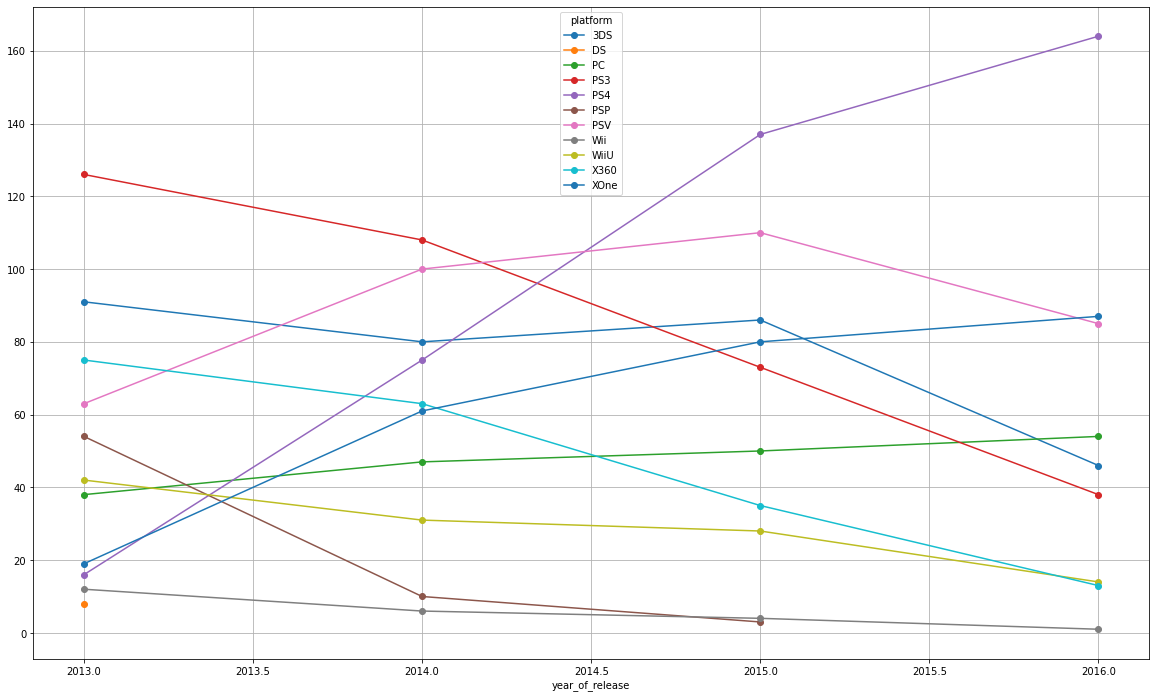

In [48]:
actual_data.pivot_table(index = 'year_of_release', columns = 'platform', values= 'world_sales', aggfunc = 'count').plot(grid=True, style='o-', figsize=(20, 12))

 В актуальном периоде наблюдается спад продаж игр на все платформы, за исключением PS4 и XOne. Таким образом PS4 и XOne являются перспективными платформами.

3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
Опишите результат.

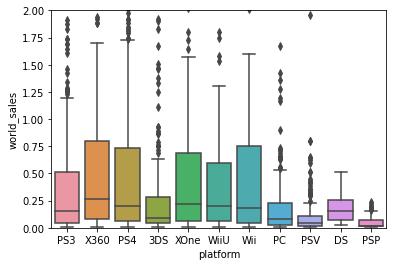

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = actual_data, y = 'world_sales', x='platform')
plt.ylim(0, 2)
plt.show()

3.6 •	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


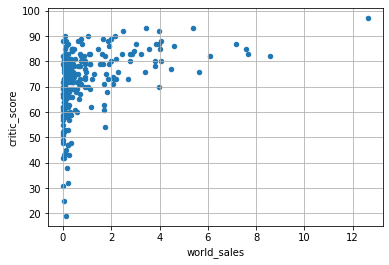

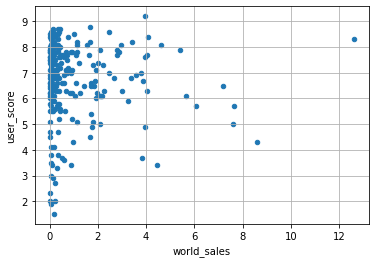

In [50]:
ps4_data= actual_data[actual_data['platform'] == 'PS4'][['world_sales', 'critic_score', 'user_score']]
ps4_data.plot(x = 'world_sales', y = 'critic_score', kind = 'scatter', grid = True)
ps4_data.plot(x = 'world_sales', y = 'user_score', kind = 'scatter', grid = True)
ps4_data.corr()

3.7 Соотнесите выводы с продажами игр на других платформах.

,world_sales,critic_score,user_score
world_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


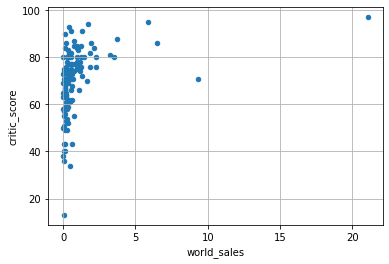

In [51]:
ps3_data= actual_data[actual_data['platform'] == 'PS3'][['world_sales', 'critic_score', 'user_score']]
ps3_data.plot(x = 'world_sales', y = 'critic_score', kind = 'scatter', grid = True)
ps3_data.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


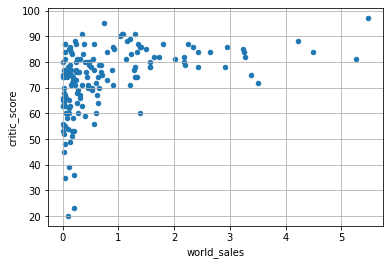

In [52]:
x_one_data= actual_data[actual_data['platform'] == 'XOne'][['world_sales', 'critic_score', 'user_score']]
x_one_data.plot(x = 'world_sales', y = 'critic_score', kind = 'scatter', grid = True)
x_one_data.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


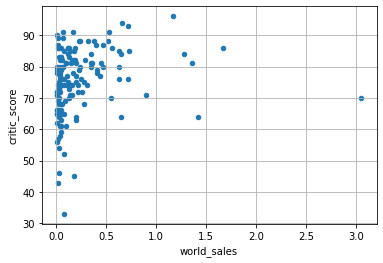

In [53]:
pc_data= actual_data[actual_data['platform'] == 'PC'][['world_sales', 'critic_score', 'user_score']]
pc_data.plot(x = 'world_sales', y = 'critic_score', kind = 'scatter', grid = True)
pc_data.corr()

3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
Выделяются ли жанры с высокими и низкими продажами?

In [54]:
actual_data.groupby('genre')['world_sales'].sum().sort_values(ascending=False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: world_sales, dtype: float64

Самые популярные жанры - Action, Shooter и Спорт. Самые непопулярные - Стратегии и пазлы.

In [55]:
best_genre = actual_data.pivot_table(index='genre', values='world_sales', aggfunc='mean')
best_genre = best_genre.sort_values(by='world_sales', ascending=False)
best_genre

,world_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


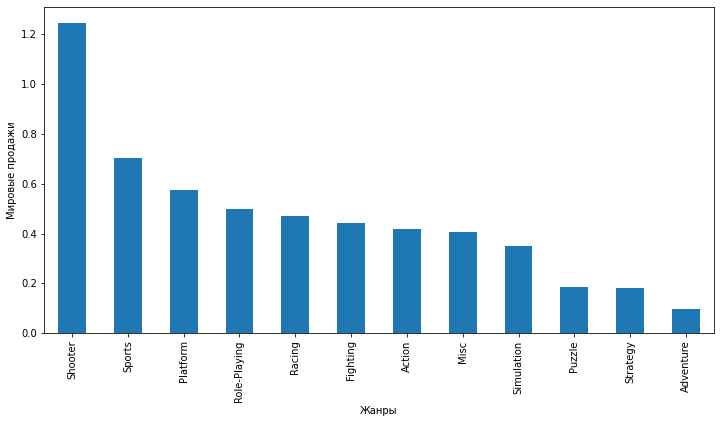

In [56]:
actual_data.pivot_table(index='genre', values='world_sales').sort_values('world_sales', ascending=False).plot(kind='bar', y='world_sales', figsize=(12, 6), legend=False).set(xlabel='Жанры', ylabel='Мировые продажи')

plt.show()

Игры, стабильно приносящие доход - шутеры и спортивные симуляторы.

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP)

In [57]:
actual_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.29
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


топ-5 по Северной Америке - PS4, XOne, X360, PS3 и 3DS
топ-5 по Европейскому региону - PS4, PS3, XOne, X360 и 3DS
топ-5 по Японии - 3DS, PS3, PSV, PS4 и WiiU

<AxesSubplot:xlabel='platform'>

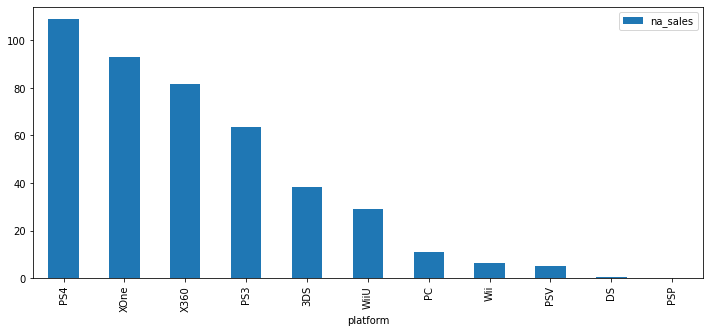

In [58]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(12,5))

<AxesSubplot:xlabel='platform'>

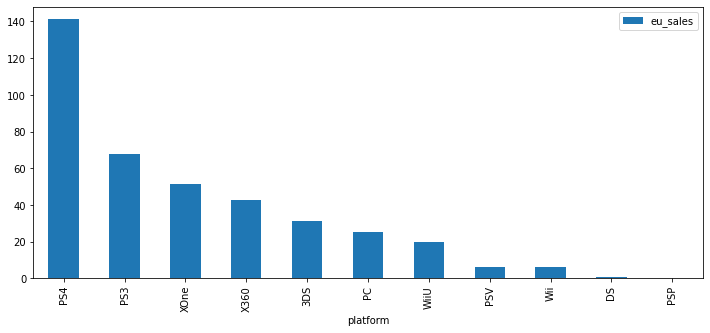

In [59]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(12,5))

<AxesSubplot:xlabel='platform'>

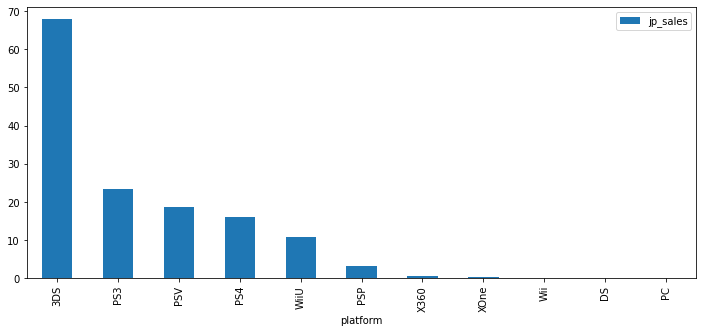

In [60]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(12,5))

In [61]:
actual_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Adventure,7.14,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Puzzle,0.83,1.00,1.18
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61


<AxesSubplot:ylabel='na_sales'>

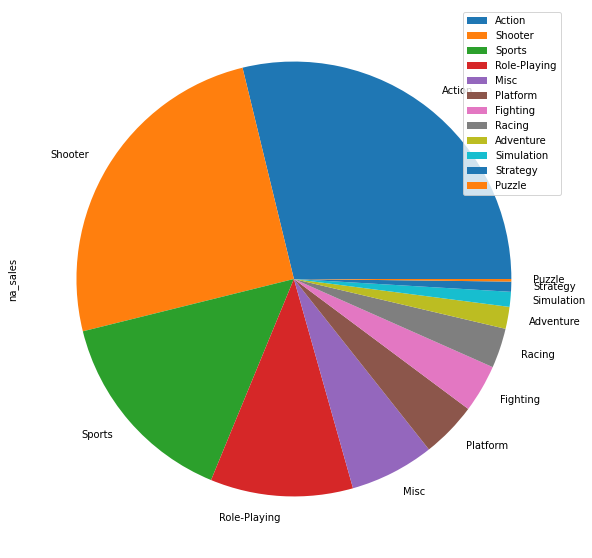

In [62]:
actual_data.pivot_table(index = 'genre',values='na_sales',aggfunc='sum').sort_values(ascending=False, by='na_sales').plot(kind='pie', figsize=(10,10), y= 'na_sales')

<AxesSubplot:ylabel='eu_sales'>

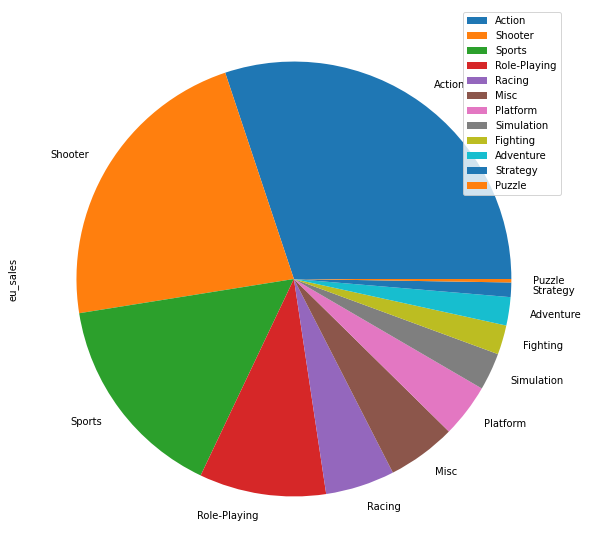

In [63]:
actual_data.pivot_table(index = 'genre',values='eu_sales',aggfunc='sum').sort_values(ascending=False, by='eu_sales').plot(kind='pie', figsize=(10,10), y= 'eu_sales')

<AxesSubplot:ylabel='jp_sales'>

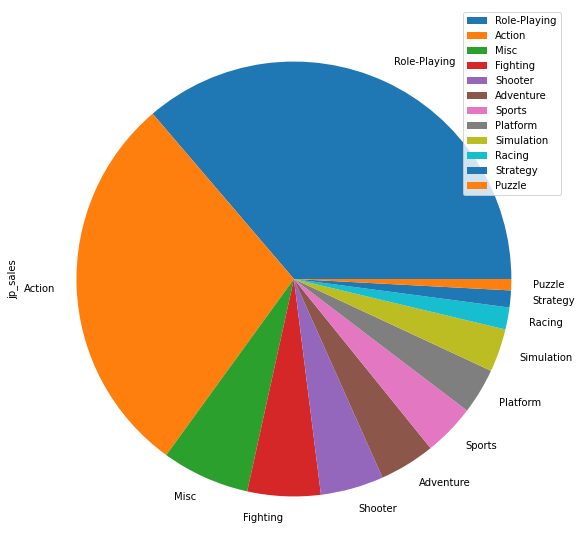

In [64]:
actual_data.pivot_table(index = 'genre',values='jp_sales',aggfunc='sum').sort_values(ascending=False, by='jp_sales').plot(kind='pie', figsize=(10,10), y= 'jp_sales')

топ-5 по Северной Америке - Action, Shooter, Sports, Role-Playing и Misc
топ-5 по Европейскому региону - Action, Shooter, Sports, Role-Playing и Racing
топ-5 по Японии - Role-Playing, Action, Misc, Fighting и Shooter

<AxesSubplot:xlabel='genre'>

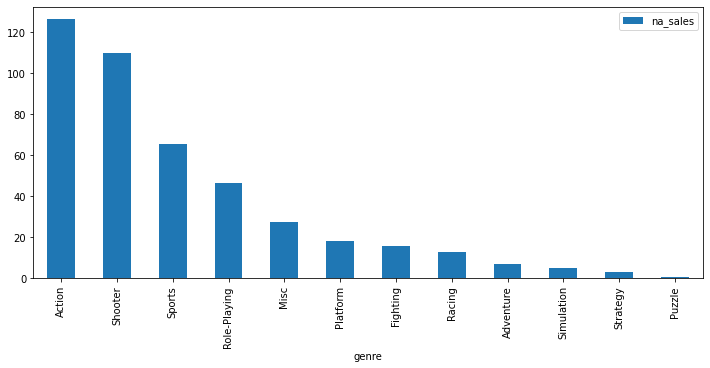

In [65]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(12,5))

Самыми популярными в Северной Америке являются игры в жанре Экшн, шутер и спорт.

<AxesSubplot:xlabel='genre'>

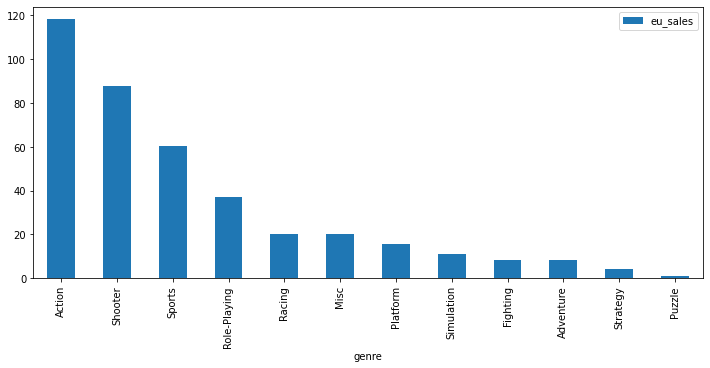

In [66]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(12,5))

Самыми популярными в Европе являются игры в жанре Экшн, шутер и спорт.

<AxesSubplot:xlabel='genre'>

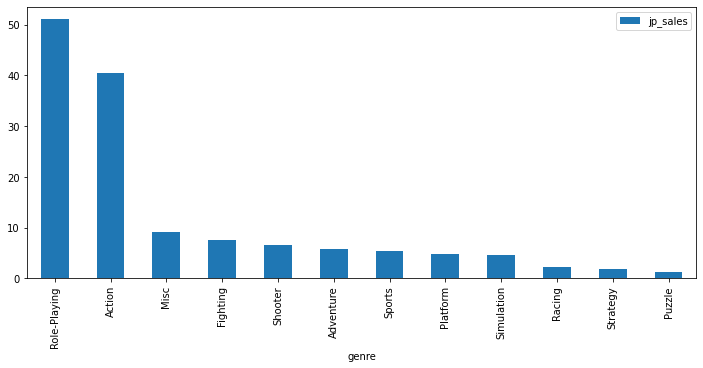

In [67]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(12,5))

Самыми популярными в Японии являются игры в жанре ролевые игры, шутер и музыка.

In [68]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [69]:
import warnings
warnings.filterwarnings("ignore")
actual_data['rating'] = actual_data['rating'].fillna('no_rating')

In [70]:
pd.pivot_table(actual_data, index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum').sort_values('na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
M,145.32,14.11,165.21
no_rating,78.91,85.05,89.42
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
T,41.95,20.59,49.79


ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

<AxesSubplot:xlabel='rating'>

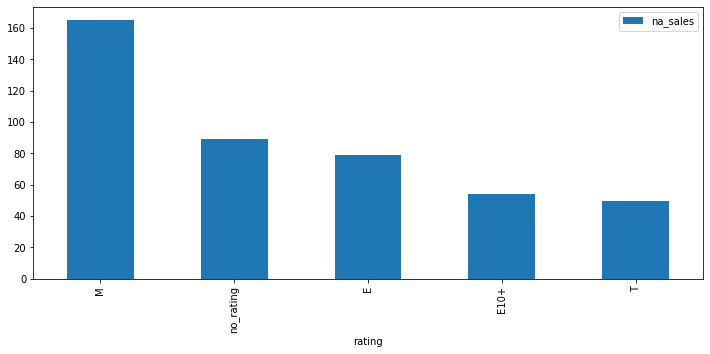

In [71]:
actual_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(12,5))

<AxesSubplot:xlabel='rating'>

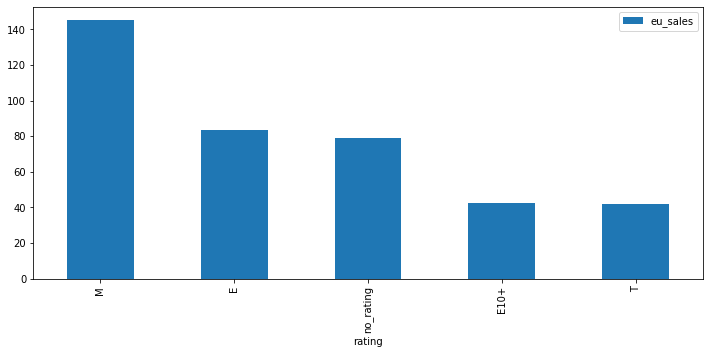

In [72]:
actual_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(12,5))

<AxesSubplot:xlabel='rating'>

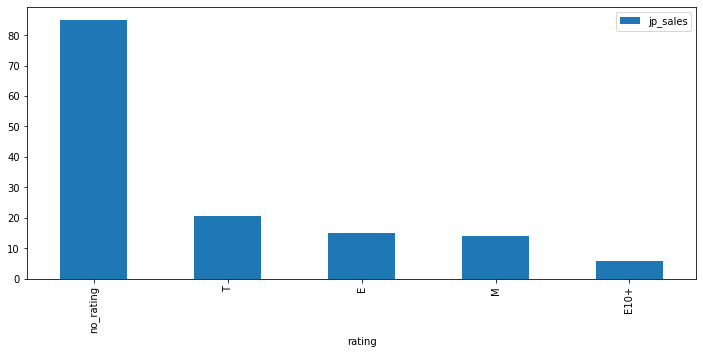

In [73]:
actual_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(12,5))

Во всех странах примерно одинаковая картина. Самые большие продажи приходятся на игры с рейтингом 
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет (проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики)
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. (такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"))
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. (проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику).  Анализ проводился без учета рейтинга "no_rating". При этом в Японии лидируют игры именно с этим ретингом. Возможно в это срате имеется свой личный ретинг игр или это ощибка в выгрузке.

Шаг 5. Проверьте гипотезы

In [74]:
actual_data = actual_data.dropna(subset=['user_score'])
actual_data.user_score = actual_data.user_score.astype('float64')

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action и Sports разные.

In [75]:
actual_data[actual_data['platform'].isin(['PC', 'XOne'])].groupby('platform')['user_score'].mean()

platform
PC      6.269677
XOne    6.521429
Name: user_score, dtype: float64

In [76]:
actual_data[actual_data['genre'].isin(['Action', 'Sports'])].groupby('genre')['user_score'].mean()

genre
Action    6.837532
Sports    5.238125
Name: user_score, dtype: float64

Гипотеза верна

5.2 Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.


Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [77]:
from scipy import stats as st

In [78]:
alpha = 0.02
test = st.ttest_ind(actual_data[actual_data['platform']=='XOne']['user_score'],
                       actual_data[actual_data['platform']=='PC']['user_score'])
print('p-:', test.pvalue)
if test.pvalue < alpha:
    print("отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-: 0.14012658403611647
Не отвергаем нулевую гипотезу


Нулевая гипотеза первой гипотезы гласит - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза гласит - Средние пользовательские рейтинги жанров Action и Sports различаются .

In [79]:
alpha = 0.02
test = st.ttest_ind(actual_data[actual_data['genre'] == 'Action']['user_score'],
                       actual_data[actual_data['genre'] == 'Sports']['user_score'])
print('p-:', test.pvalue)
if test.pvalue < alpha:
    print("отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-: 1.0517832389140023e-27
отвергаем нулевую гипотезу


Первая и вторая гипотезы подтвердились.

Платформа XOne старается из года в год набирать новых пользователей, чтобы соревноваться не только с PS4, но и с самой распространненной платформой на земле PC.

Различия между Action и Sports существуют из-за опыта создания игр

В топ 3 продаж среди игр на платформы за все время:
1)PlayStation 2 
2)Xbox360 
3)PlayStation 3 
Представленный ТОПа уже не является актуальными.
В настоящее время новые платформы (PS4, XOne) быстро набирают популярность продажи игр на другие снижаются что свящано  с выпуском новых поколений этих платфлорм. 

Самые прибыльные жанры являются шутеры и экшены. 
Значения их продаж почти доходят до 140 млн проданных копий. 
ТОП 4 можно отметить следующие жанры:
Шутер
Экшен
Спортивные игры
Ролевые игры 

Портрет Американца:
Предпочитает играть в игры на PS 4.
Чаще всего играет в шутеры c рейтингом «M» («Mature») — «Для взрослых».
Портрет Европейца:
Предпочитает играть в игры на PS 4.
В основном играет в игры категории Action c рейтингом «M» («Mature») — «Для взрослых».
Портрет Японца:
Предпочитает играть в игры на 3DS.
Любит поиграть в игры в жанре ролевые игры и Action


Для успешной деятельности на мировом рынке компьютерных игр интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры необходимо реализовать продукт исходя из предпочтений каждого из регионов (Северной Америке, Европе и Японии).
В первую очередь необходимо оренироваться на игры для самых актуальных платформ:
Северной Америке - PS4, XOne, X360, PS3 и 3DS
Европа - PS4, PS3, XOne, X360 и 3DS
Япония - 3DS, PS3, PSV, PS4 и WiiU.
Наиболее популярные игры относятся к жанрам экшн, шутер и спорт для Америки и Европы рейтина «T» («Teen») — «Подросткам» и «E» («Everyone») — «Для всех». При этом, для Японии характерна немного другая специфика - основное направления игр -  это игры в жанре ролевые игры экшн и музыка без рейтинга, что может быть связано с собственным рейтингам по играм или это ошибка в данных.